In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree # importa a arvore de decisão
from sklearn import tree # importa a função tree para plotar a arvore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [17]:
df = pd.read_csv('dadosacoes.csv')

In [18]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [19]:
nome = df['nome ação']
preço = df['preço ação R$']
mercado = df['valor de mercado R$ -(Bilhões)']

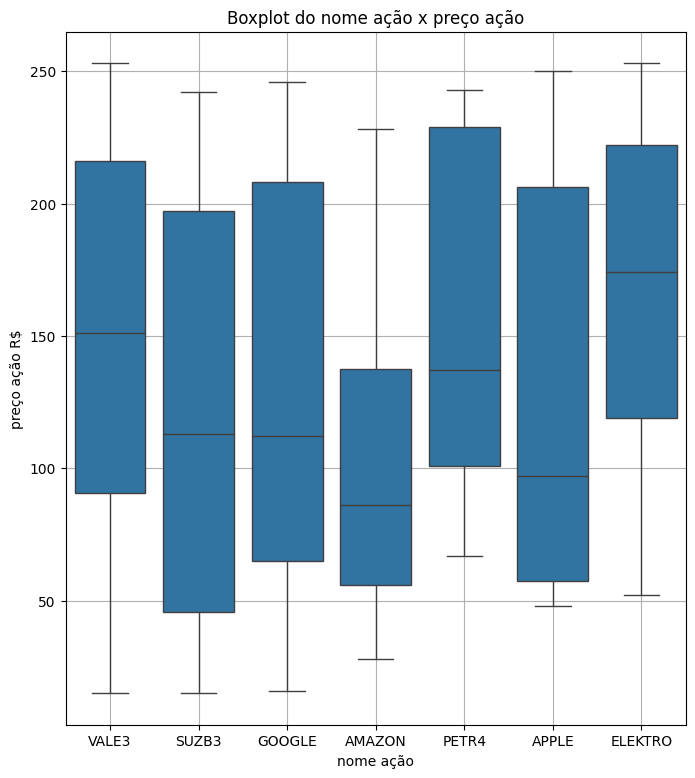

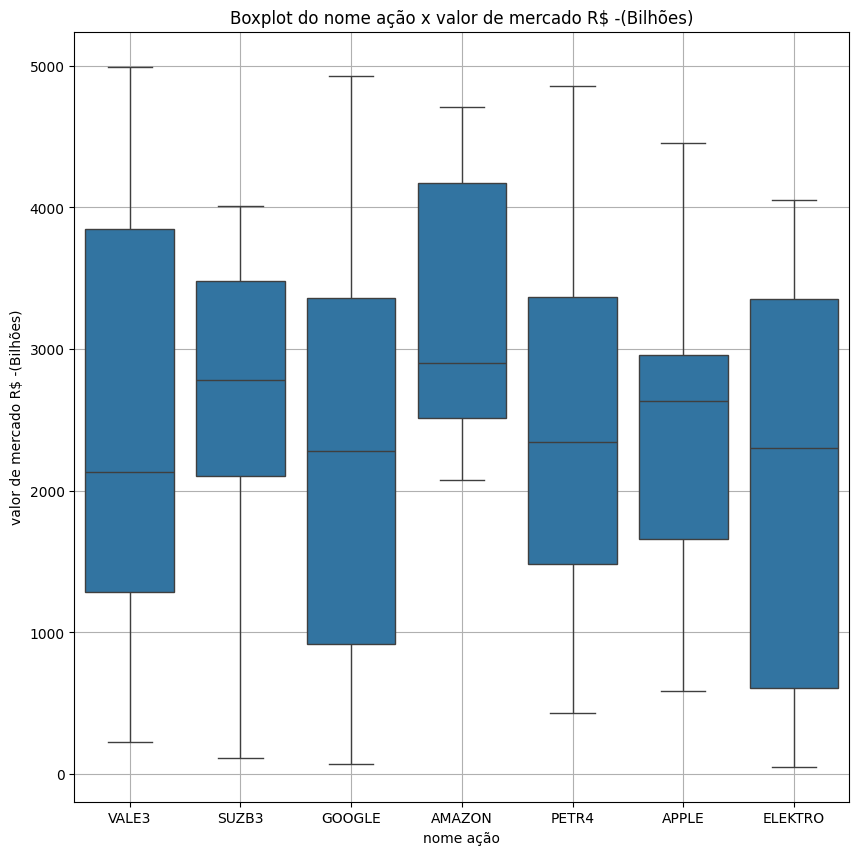

In [20]:
plt.figure(figsize=(8,9))
plt.title('Boxplot do nome ação x preço ação')
sns.boxplot(x = nome, y = preço )
plt.grid()


plt.figure(figsize=(10,10))
plt.title('Boxplot do nome ação x valor de mercado R$ -(Bilhões)')
sns.boxplot(x = nome, y = mercado )
plt.grid()



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [22]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [23]:
df_processed = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

In [24]:
print(df_processed)

    preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0             194          45                            2134   
1              91          71                            3069   
2             165          41                            2815   
3              56          34                            3613   
4             212           9                            2975   
..            ...         ...                             ...   
95            208          78                            3035   
96            253          60                            3263   
97             99          35                             980   
98             82          43                            1866   
99            111          19                             230   

    nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  \
0             False              False             False            False   
1             False              False             False         

In [25]:
dados = df_processed[['preço ação R$', 'valor de mercado R$ -(Bilhões)']]



In [26]:
dados

,preço ação R$,valor de mercado R$ -(Bilhões)
0,194,2134
1,91,3069
2,165,2815
3,56,3613
4,212,2975
...,...,...
95,208,3035
96,253,3263
97,99,980
98,82,1866


In [27]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=4) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans(n_clusters=4)

In [28]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  14254937.009231249


In [29]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

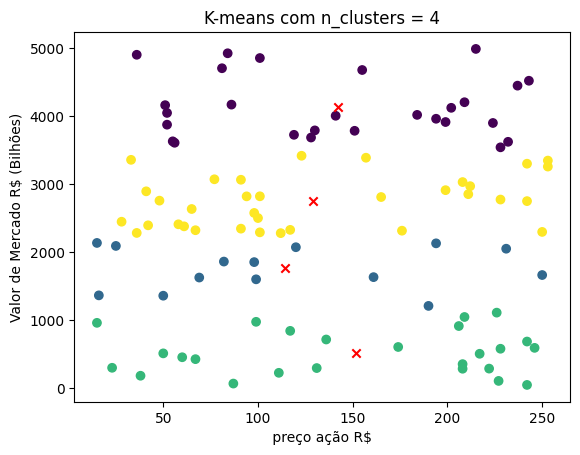

In [30]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels) # Correção: acessando colunas pelo nome
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 4')
plt.show()


In [31]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=5) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans(n_clusters=5)

In [32]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  9030543.422680218


In [33]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

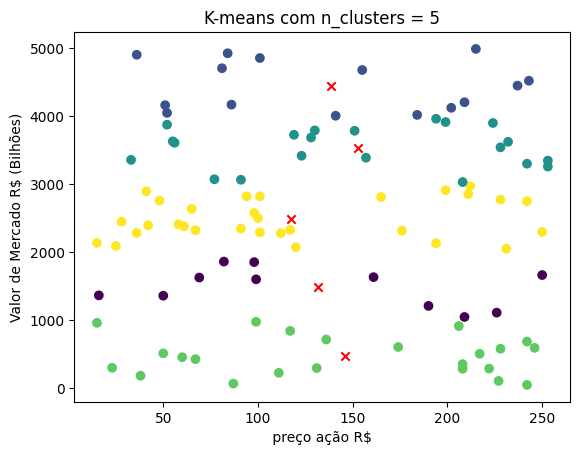

In [34]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels) # Correção: acessando colunas pelo nome
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 5')
plt.show()

# Nova seção

In [36]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=8) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans()

In [37]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  3050266.579479001


In [38]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

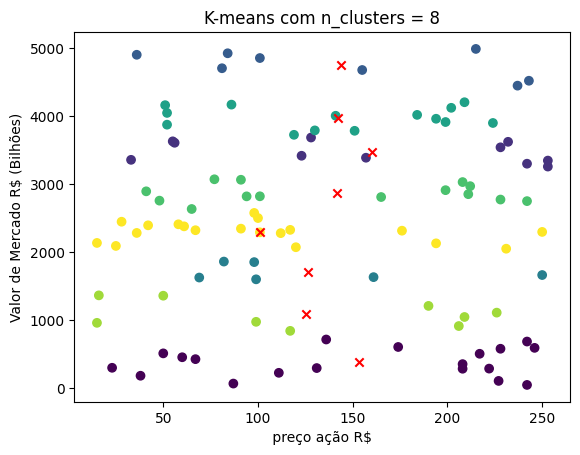

In [39]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 8')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score


In [41]:
silhouette_score(dados, kmeans.predict(dados))


0.5552127276019744

In [42]:
def avaliacao(dados):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados, kmeans.predict(dados))))

    return silhueta, inercia

silhueta, inercia = avaliacao(dados)  # Calling the function with 'dados'
print(silhueta) # Printing the result to see the output


['k=2 - 0.561226614554859', 'k=3 - 0.6240085666625622', 'k=4 - 0.5297293337779799']


In [43]:
silhueta, inercia = avaliacao(dados)
print(silhueta)

['k=2 - 0.561226614554859', 'k=3 - 0.6240085666625622', 'k=4 - 0.5297293337779799']


In [44]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

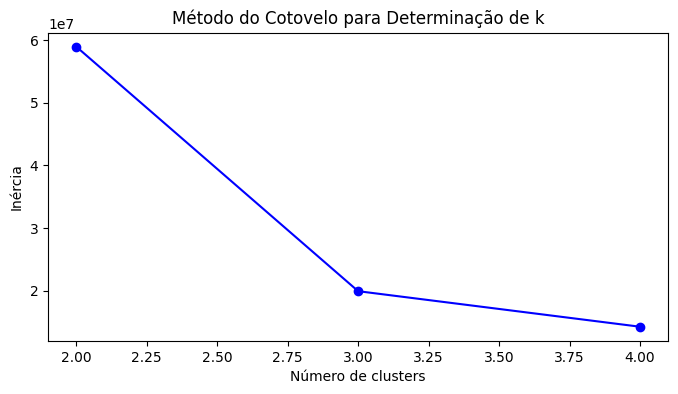

In [45]:
plot_cotovelo(inercia)


In [46]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)

    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)

    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()

        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i

        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos

    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')

    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')

    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])

    plt.show()

Valor médio para 3 clusters: 0.624


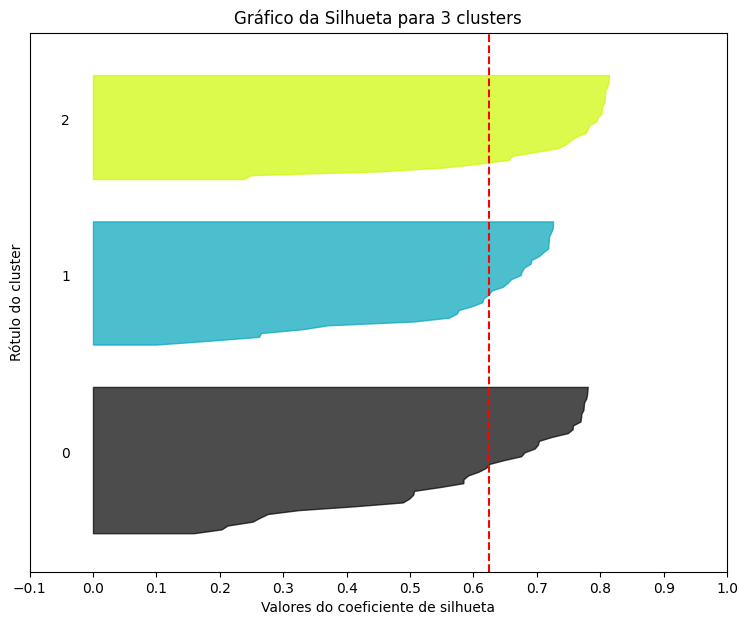

In [47]:
graf_silhueta(3, dados)


<ipython-input-127-851227f4aed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Cluster_4'] = labels


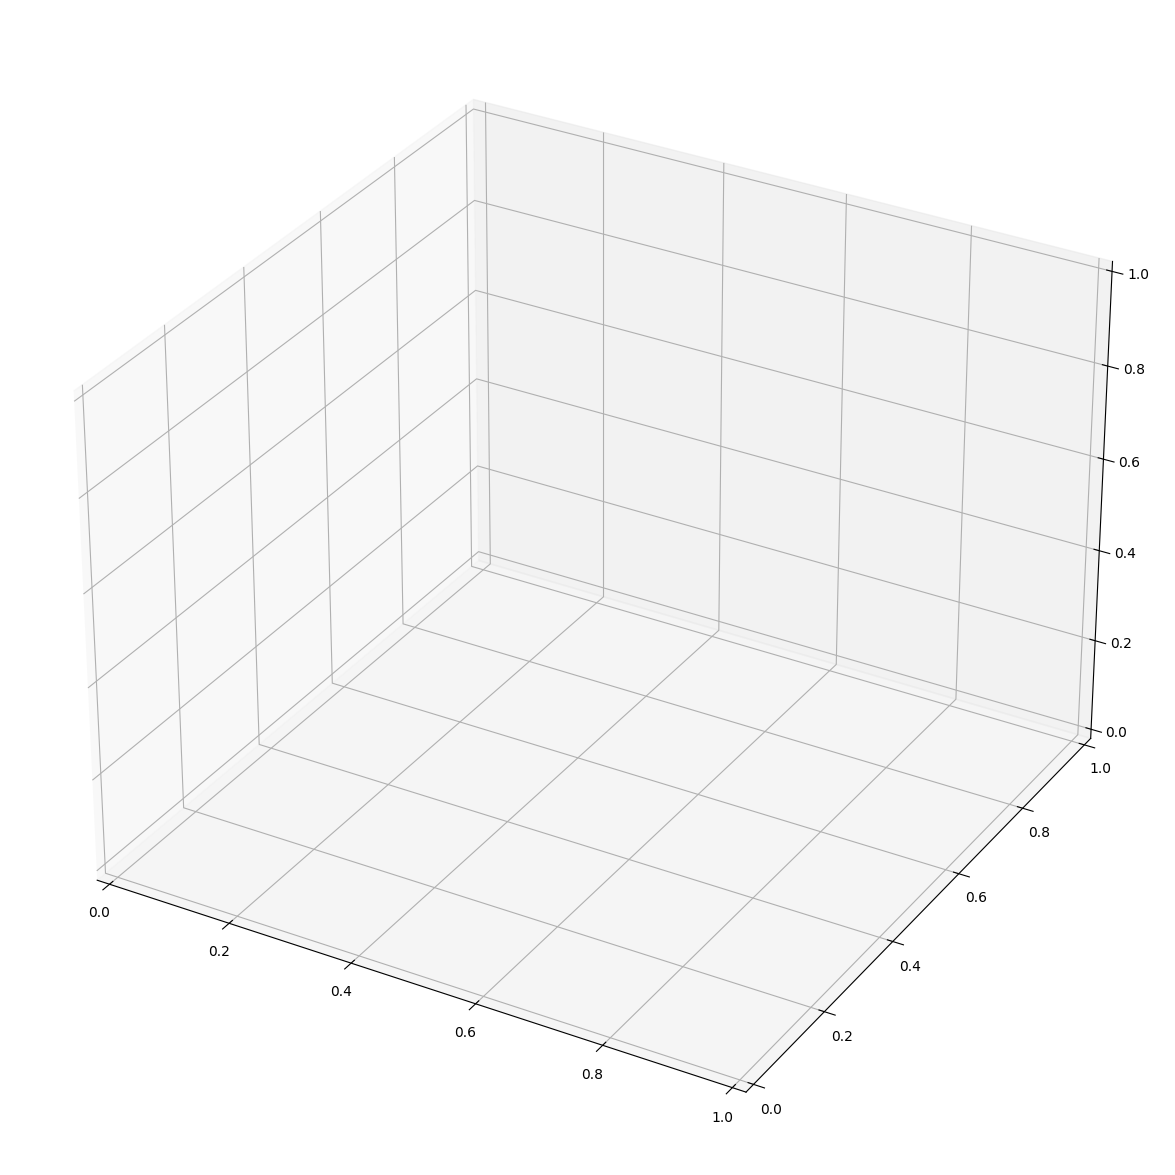

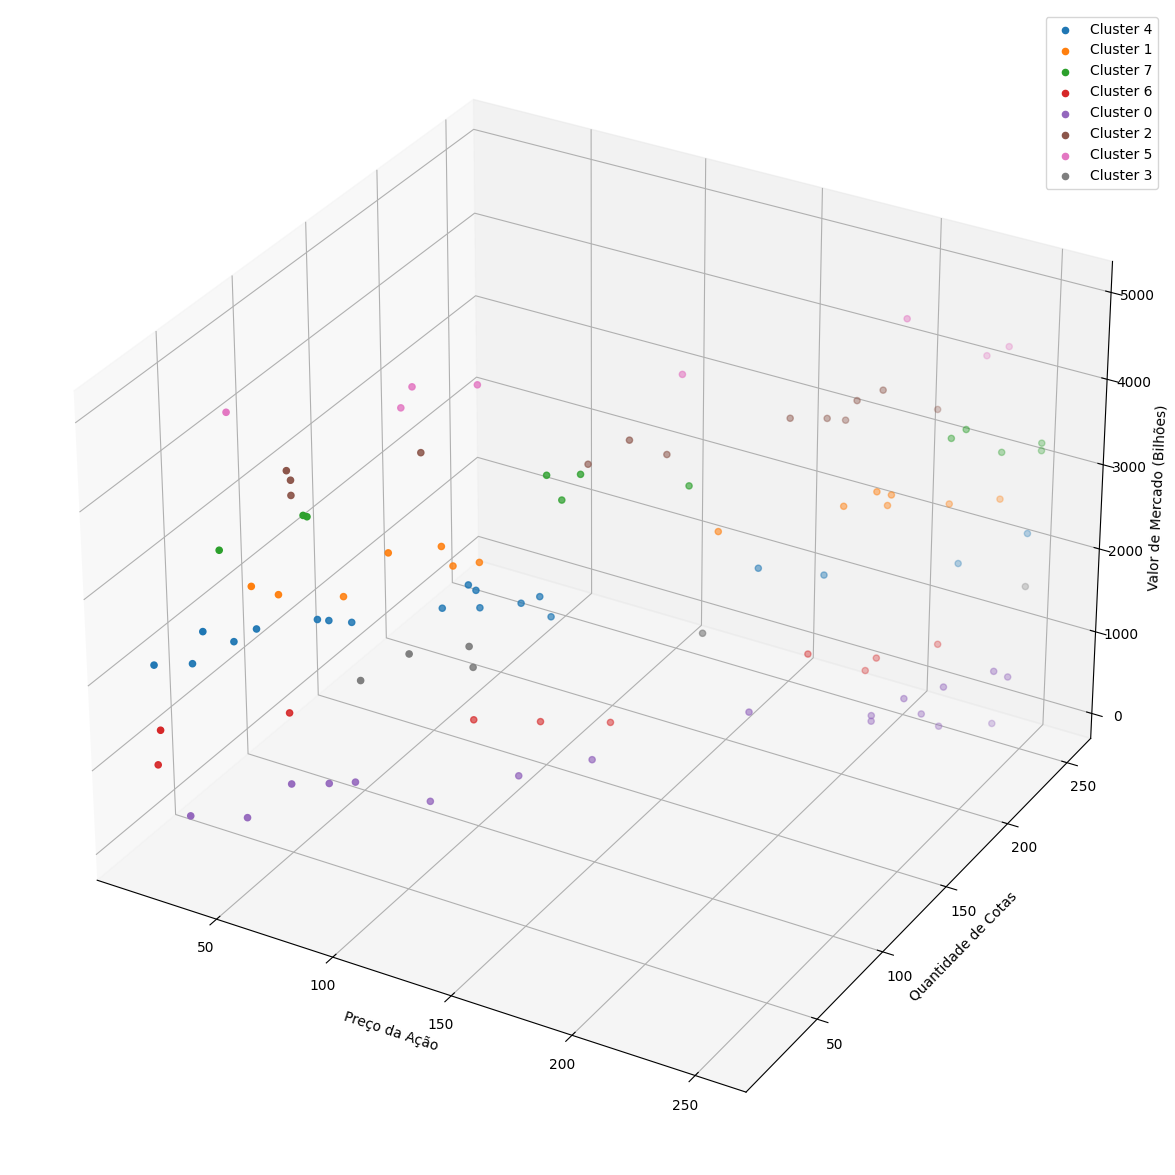

In [ ]:
dados['Cluster_4'] = labels

# Plotando o gráfico 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtendo os clusters únicos
clusters = dados['Cluster_4'].unique()  # Corrigido: acessando a coluna 'Cluster_4'



fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtendo os clusters únicos
clusters = dados['Cluster_4'].unique()

# Iterando e plotando os clusters com cores distintas
for i, cluster in enumerate(clusters):
    cluster_data = dados[dados['Cluster_4'] == cluster]
    ax.scatter(cluster_data['preço ação R$'],
               cluster_data['preço ação R$'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))

# Títulos e rótulos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Legenda
plt.legend()

# Exibindo o gráfico
plt.show()


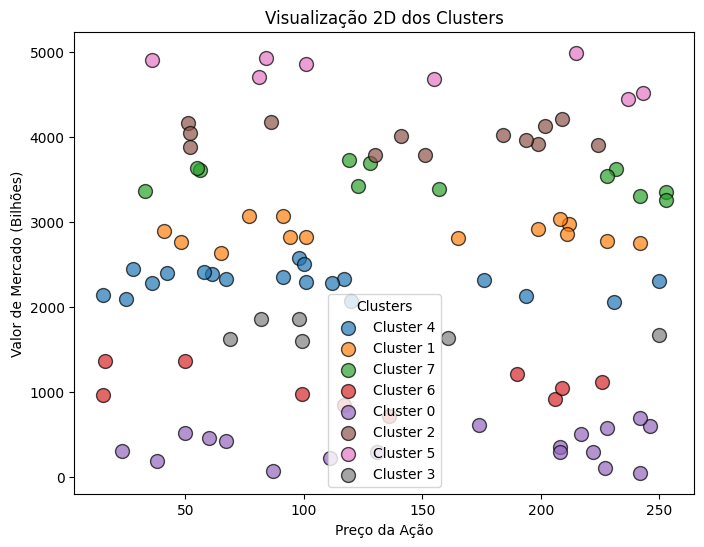

In [ ]:
plt.figure(figsize=(8, 6))

# Atribuindo cores aos clusters
for i, cluster in enumerate(dados['Cluster_4'].unique()):
    cluster_data = dados[dados['Cluster_4'] == cluster]

    # Gerando uma cor para cada cluster com plt.cm.tab10
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


In [ ]:
5) Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

A principal vantagem do aprendizado não supervisionado é que ele pode descobrir padrões e
estruturas em dados não rotulados, sem precisar de supervisão. Isso é útil em situações onde
rotular dados é difícil ou caro. Já o aprendizado supervisionado exige rótulos e é focado em
previsões específicas.